# Run dimensionality across animals.

In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.append("../../")

import pyaldata as pyal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from tools.reports.report_initial import run_initial_report
from tools.params import Params, colors
from tools.dsp.preprocessing import preprocess
import tools.viz.mean_firing as firing
import tools.viz.dimensionality as dim
import tools.viz.utilityTools as vizutils
import tools.decoding.rrr as rrr
import tools.decoding.decodeTools as decutils
import tools.dataTools as dt

from pathlib import Path



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Report

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field SSp_KSLabel could not be converted to i

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of SSp_spikes on 99.85935302390999% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of SSp_spikes on 99.85935302390999% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of SSp_spikes on 99.85935302390999% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of SSp_spikes on 99.85935302390999% of tr

Combined every 3 bins
Resulting SSp_spikes ephys data shape is (NxT): (94, 16000)
Resulting VAL_spikes ephys data shape is (NxT): (198, 16000)
Resulting all_spikes ephys data shape is (NxT): (21, 16000)
Resulting MOp_spikes ephys data shape is (NxT): (180, 16000)
Resulting CP_spikes ephys data shape is (NxT): (302, 16000)


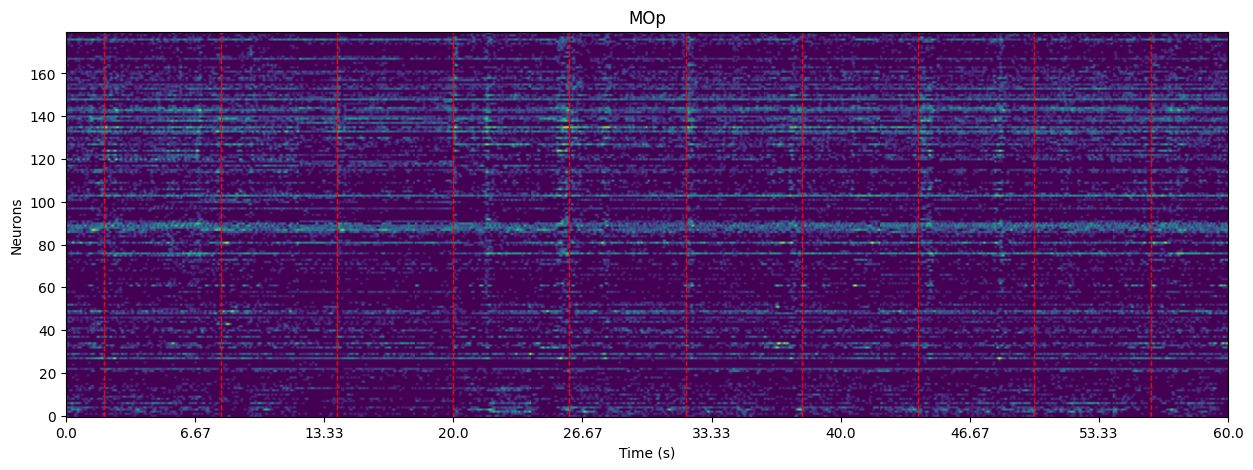

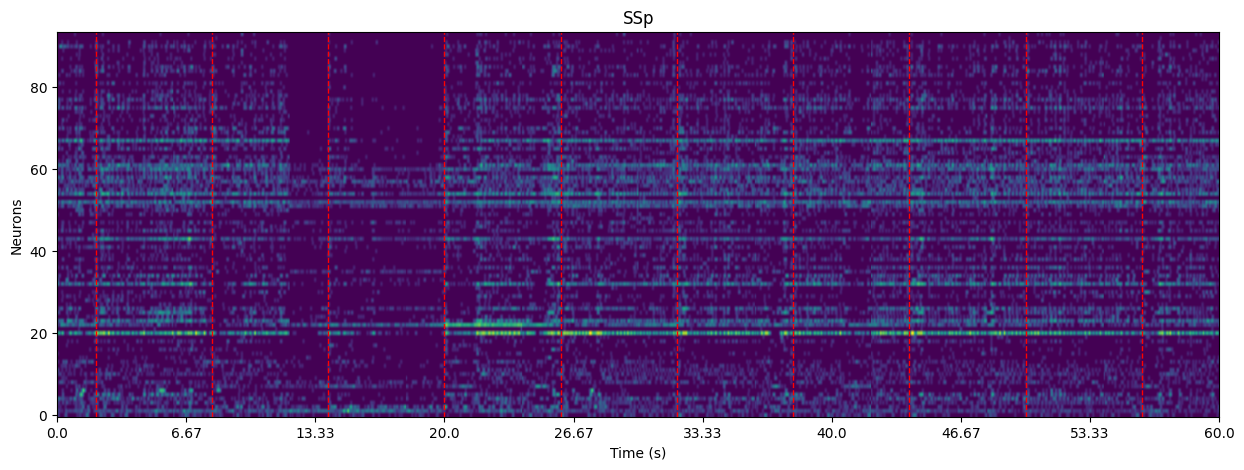

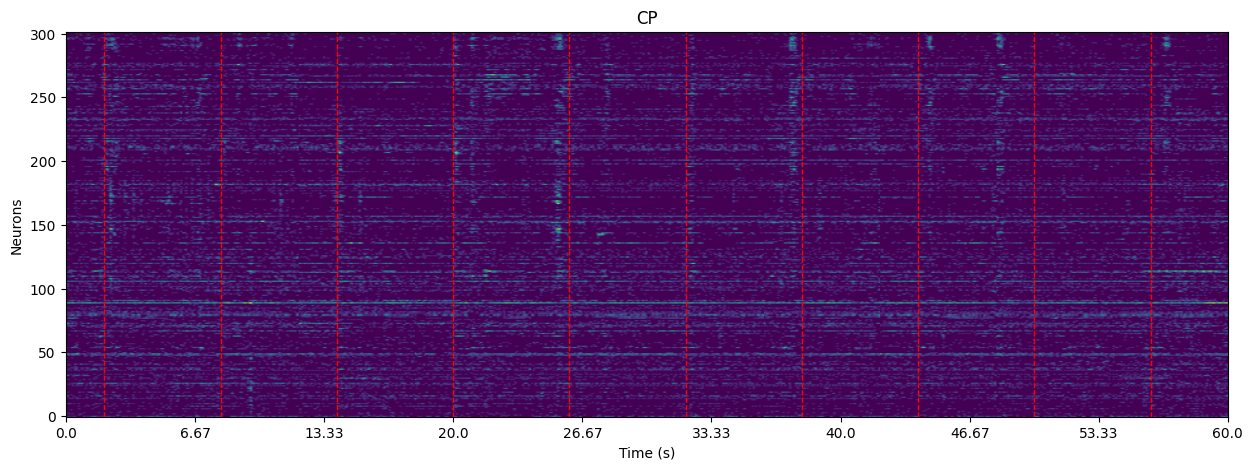

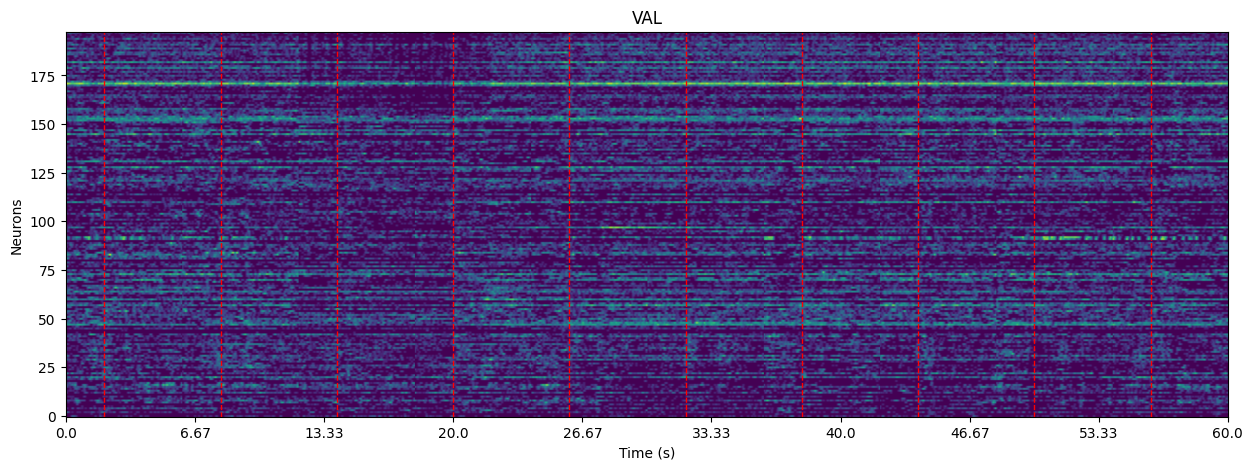

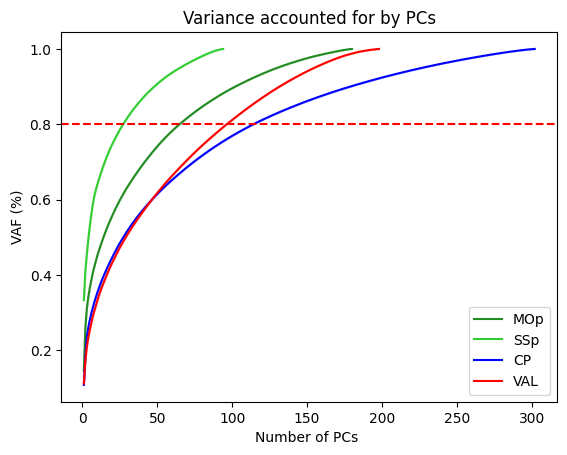

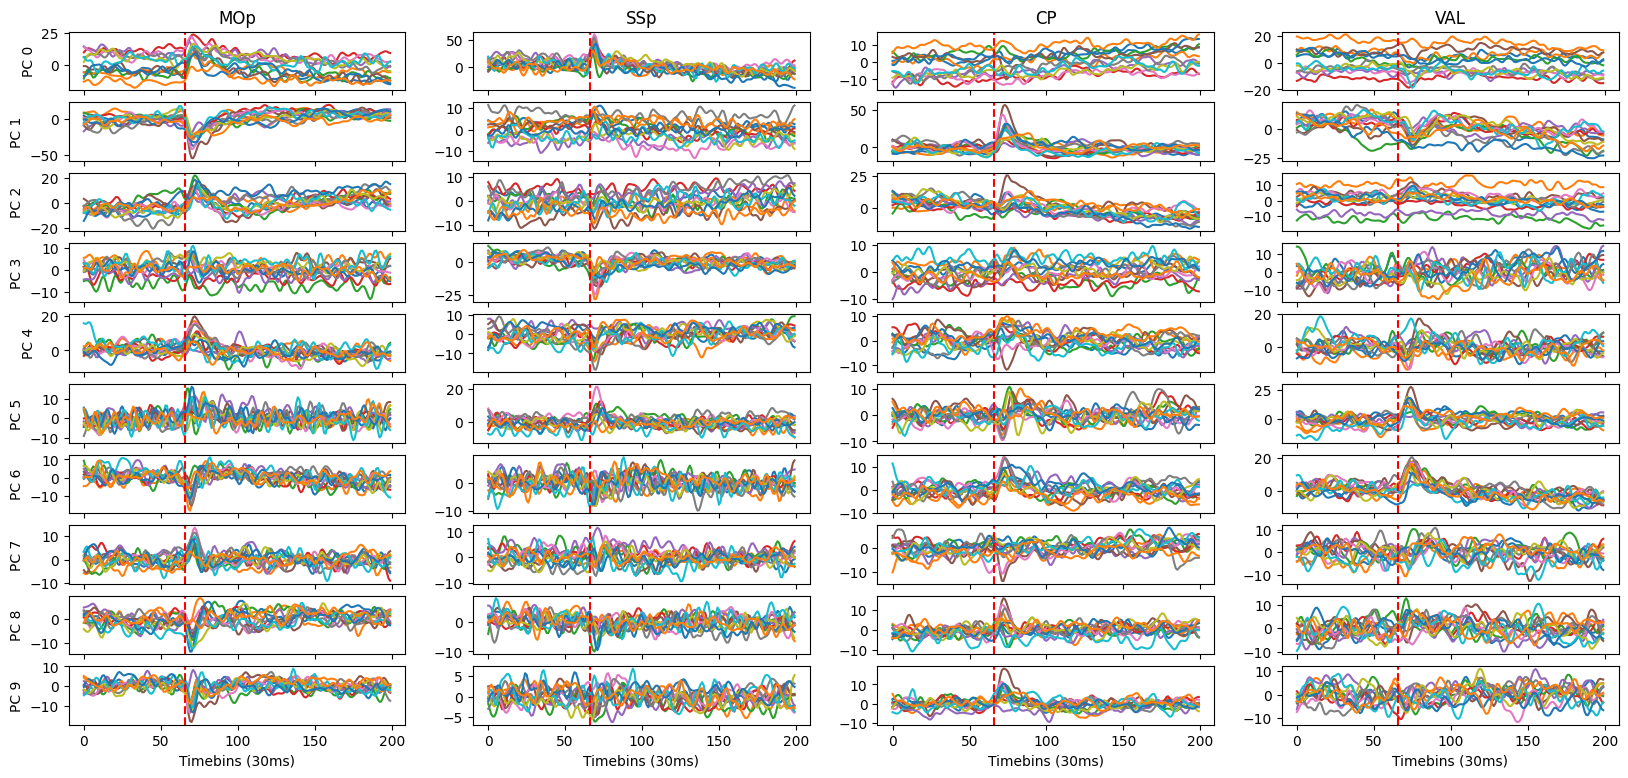

In [2]:
session = 'M063/M063_2025_03_12_14_00'
data_dir = "/data/bnd-data/raw/"

df = pyal.load_pyaldata(data_dir + session)
areas=["MOp", "SSp", "CP", "VAL"]
run_initial_report(df, areas)
del df

## PR

In [ ]:
prs = {}
# areas=["MOp", "SSp", "CP", "VAL"]

sessions = [
    # 'M046_2024_12_18_16_00' 
    'M046_2024_12_19_13_30',
    'M061_2025_03_05_14_00',
    'M061_2025_03_06_14_00',
    'M062_2025_03_19_14_00',
    'M062_2025_03_20_14_00',
    'M062_2025_03_21_14_00',
    'M063_2025_03_12_14_00',
    'M063_2025_03_13_14_00',
    'M063_2025_03_14_15_30'
]

data_dir = "/data/bnd-data/raw/"


for session in sessions:
    df = pyal.load_pyaldata(data_dir + session[:4] + '/' + session)
    df = preprocess(df, only_trials=False)
    prs[session] = dim.plot_participation_ratio_per_session(df, areas=None, plot=False)

del df

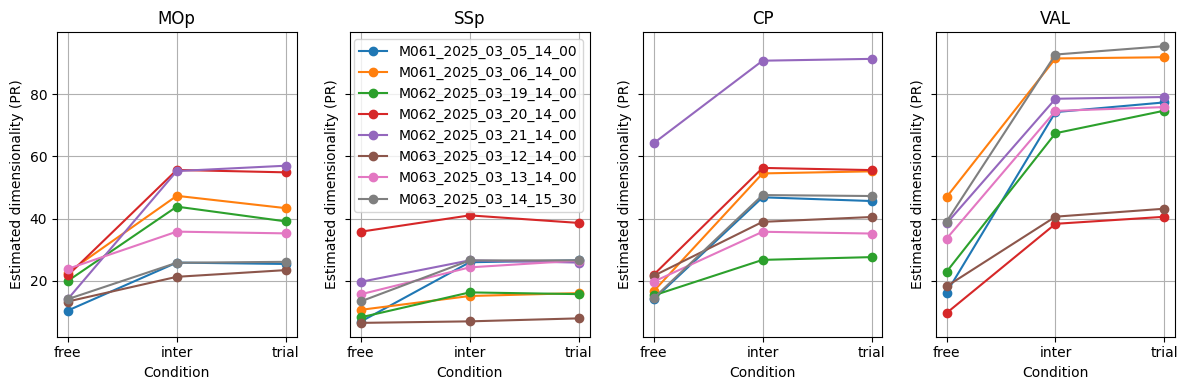

In [12]:
regions = ['MOp', 'SSp', 'CP', 'VAL']
conditions = ['free', 'inter', 'trial']
sessions = list(prs.keys())

fig, axs = plt.subplots(1, 4, figsize=(12, 4), sharey='all')
# axs = axs.flatten()

for i, region in enumerate(regions):
    ax = axs[i]
    for session in sessions:
        values = [prs[session][region][cond][0] for cond in conditions]
        ax.plot(conditions, values, marker='o', label=session)
    ax.set_title(region)
    ax.set_ylabel('Estimated dimensionality (PR)')
    ax.set_xlabel('Condition')
    ax.grid(True)

axs[1].legend()


plt.tight_layout()
plt.show()

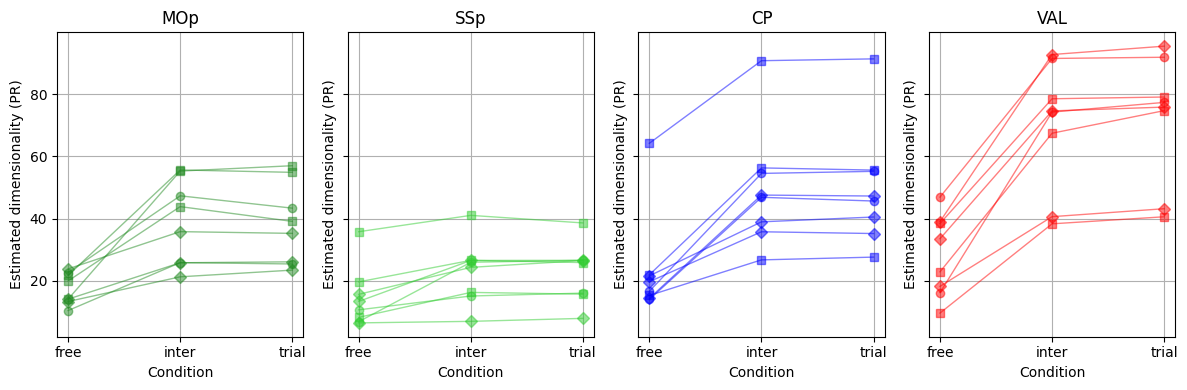

In [28]:
import numpy as np
import matplotlib.pyplot as plt

regions = ['MOp', 'SSp', 'CP', 'VAL']
conditions = ['free', 'inter', 'trial']
sessions = list(prs.keys())

# Assign each animal a unique marker
animals = sorted(set(sess[:4] for sess in sessions))
markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'X', 'H']  # Add more if needed
animal_marker_map = {animal: markers[i % len(markers)] for i, animal in enumerate(animals)}

fig, axs = plt.subplots(1, 4, figsize=(12, 4), sharey='all')

for i, region in enumerate(regions):
    ax = axs[i]
    session_values = []

    for session in sessions:
        animal = session[:4]
        marker = animal_marker_map[animal]

        # Handle SSp vs SSp_ll
        region_key = region
        if region == 'SSp' and region not in prs[session]:
            if 'SSp_ll' in prs[session]:
                region_key = 'SSp_ll'
            else:
                continue  # skip session if region not found

        try:
            values = [prs[session][region_key][cond][0] for cond in conditions]
        except KeyError:
            continue  # skip missing condition data

        session_values.append(values)
        ax.plot(conditions, values, color=getattr(colors, region), alpha=0.5, marker=marker, linestyle='-', linewidth=1)

    # session_values = np.array(session_values)
    # if len(session_values) > 0:
    #     means = session_values.mean(axis=0)
    #     stds = session_values.std(axis=0)
    #     ax.errorbar(conditions, means, yerr=stds, fmt='o', color='black', capsize=0, markersize=6, label='Mean ± STD')

    ax.set_title(region)
    ax.set_ylabel('Estimated dimensionality (PR)')
    ax.set_xlabel('Condition')
    ax.grid(True)

# Optional: Legend for animal markers
# handles = [plt.Line2D([0], [0], marker=animal_marker_map[a], linestyle='', color='black', label=a) for a in animals]
# axs[1].legend(handles=handles, title="Animals", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


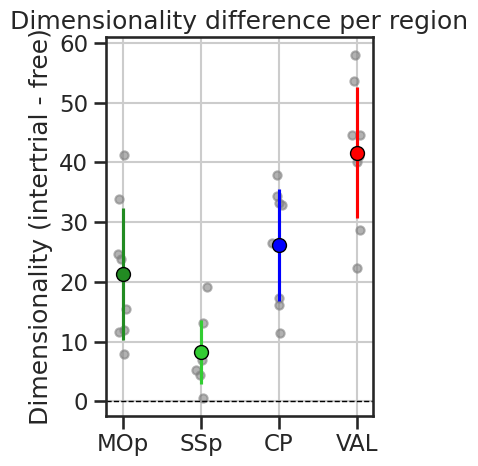

In [47]:
import numpy as np
import matplotlib.pyplot as plt

regions = ['MOp', 'SSp', 'CP', 'VAL']
sessions = list(prs.keys())

region_diffs = {region: [] for region in regions}

# Compute differences: intertrial - free
for session in sessions:
    for region in regions:
        region_key = region

        try:
            free_val = prs[session][region_key]['free'][0]
            inter_val = prs[session][region_key]['inter'][0]
            diff = inter_val - free_val
            region_diffs[region].append(diff)
        except KeyError:
            continue  # skip if any condition is missing

# Plot
with plt.style.context('seaborn-v0_8-bright'):
    sns.set_theme(context='talk', style='ticks')
    fig, ax = plt.subplots(figsize=(4, 5))

    x_positions = np.arange(len(regions))
    width = 0.6

    # Plot all session diffs as grey points
    for i, region in enumerate(regions):
        diffs = region_diffs[region]
        jitter = np.random.normal(0, 0.05, size=len(diffs))
        ax.scatter(np.full(len(diffs), x_positions[i]) + jitter, diffs, color='gray', alpha=0.6, s=35)

        # Overlay mean ± std
        if diffs:
            mean = np.mean(diffs)
            std = np.std(diffs)
            ax.errorbar(x_positions[i], mean, yerr=std, fmt='o', color=getattr(colors, region), capsize=0, markersize=10,markeredgecolor='black')

    # Format
    ax.set_xticks(x_positions)
    ax.set_xticklabels(regions)
    ax.set_ylabel("Dimensionality (intertrial - free)")
    ax.set_title("Dimensionality difference per region")
    ax.axhline(0, linestyle='--', color='black', linewidth=1)
    ax.grid(True)

    plt.tight_layout()
plt.show()


In [ ]:
%%time

prs_with_variable_neurons = {}
areas=["MOp", "SSp", "CP", "VAL"]

sessions = [
    # 'M046_2024_12_18_16_00' 
    # 'M046_2024_12_19_13_30',
    # 'M061_2025_03_05_14_00',
    # 'M061_2025_03_06_14_00',
    # 'M062_2025_03_19_14_00',
    # 'M062_2025_03_20_14_00',
    # 'M062_2025_03_21_14_00',
    # 'M063_2025_03_12_14_00',
    # 'M063_2025_03_13_14_00',
    'M063_2025_03_14_15_30'
]

data_dir = "/data/bnd-data/raw/"
step_size = 10
n_iter = 20

for session in sessions:
    prs_with_variable_neurons[session] = {}
    df = pyal.load_pyaldata(data_dir + session[:4] + '/' + session)
    df = preprocess(df, only_trials=False)
    for area in areas:
        prs_with_variable_neurons[session][area] = {}
        for condition in ['free', 'intertrial']:
            prs_with_variable_neurons[session][area][condition] = {}
            tmp_df = pyal.select_trials(df, df.trial_name==condition)
            rates = pyal.concat_trials(tmp_df, f"{area}_rates")
            prs_with_variable_neurons[session][area][condition]['neurons'] = np.arange(5, rates.shape[1]+1, step_size)
            prs_with_variable_neurons[session][area][condition]['PR'] = dim.get_pr_for_subsets_of_neurons(rates, niter=n_iter)
    

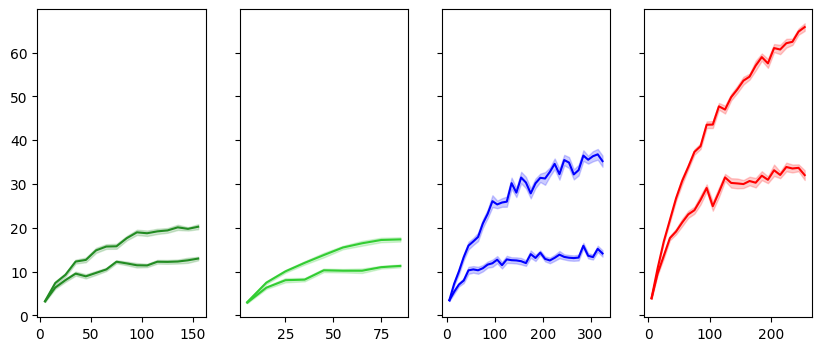

In [78]:
import scipy
fig, ax = plt.subplots(1, 4, figsize=(10, 4), sharey='all')
for area, ax_ in zip(areas, ax):
    vizutils.shaded_errorbar(
                ax_,
                x = prs_with_variable_neurons['M063_2025_03_14_15_30'][f'{area}']['intertrial']['neurons'],
                y = prs_with_variable_neurons['M063_2025_03_14_15_30'][f'{area}']['intertrial']['PR'], 
                color=getattr(colors, area), 
                label=area,
                errorStat=scipy.stats.sem
            )

    vizutils.shaded_errorbar(
                ax_,
                x = prs_with_variable_neurons['M063_2025_03_14_15_30'][f'{area}']['free']['neurons'],
                y = prs_with_variable_neurons['M063_2025_03_14_15_30'][f'{area}']['free']['PR'], 
                color=getattr(colors, area), 
                label=area,
                errorStat=scipy.stats.sem
            )
 

In [2]:
import pickle

results_path = "/home/me24/repos/earthquake-analysis/results/"

with open(results_path + "pr_all_sess_diff_num_neurons_20_iter.pkl", 'rb') as f:
    prs_with_variable_neurons = pickle.load(f)

Text(0, 0.5, 'Difference in dimensionality')

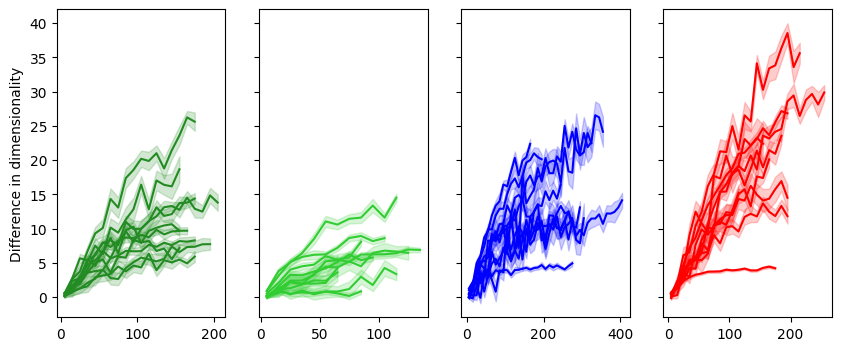

In [3]:
import scipy
areas = ["MOp", "SSp", "CP", "VAL"]
fig, ax = plt.subplots(1, len(areas), figsize=(10, 4), sharey='all')
for area, ax_ in zip(areas, ax):
    for key in prs_with_variable_neurons.keys():
        vizutils.shaded_errorbar(
                    ax_,
                    x = prs_with_variable_neurons[key][f'{area}']['intertrial']['neurons'],
                    y = prs_with_variable_neurons[key][f'{area}']['intertrial']['PR'] - prs_with_variable_neurons[key][f'{area}']['free']['PR'], 
                    color=getattr(colors, area), 
                    label=area,
                    errorStat=scipy.stats.sem
                )
ax[0].set_ylabel('Difference in dimensionality')

        # vizutils.shaded_errorbar(
        #             ax_,
        #             x = prs_with_variable_neurons[key][f'{area}']['free']['neurons'],
        #             y = prs_with_variable_neurons[key][f'{area}']['free']['PR'], 
        #             color='k', 
        #             label=area,
        #             errorStat=scipy.stats.sem
        #         )
 

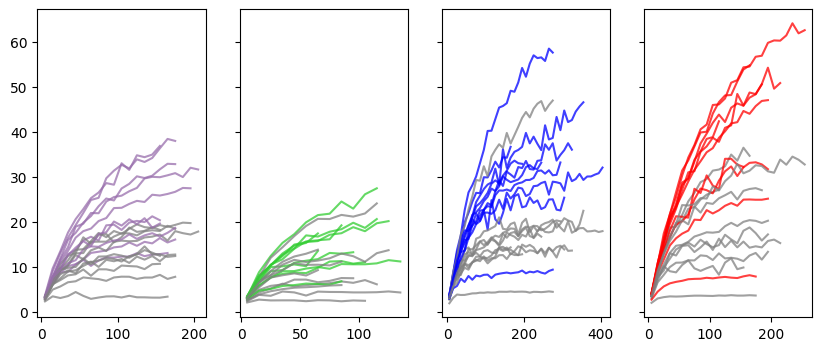

In [ ]:
import scipy
areas = ["MOp", "SSp", "CP", "VAL"]
fig, axes = plt.subplots(1, len(areas), figsize=(10, 4), sharey='all')
for area, ax in zip(areas, axes):
    for key in prs_with_variable_neurons.keys():
        ax.plot(
            prs_with_variable_neurons[key][f'{area}']['intertrial']['neurons'],
            np.mean(prs_with_variable_neurons[key][f'{area}']['intertrial']['PR'], axis=1),
            color=getattr(colors, area),
            alpha=0.75
        )
        ax.plot(
            prs_with_variable_neurons[key][f'{area}']['free']['neurons'],
            np.mean(prs_with_variable_neurons[key][f'{area}']['free']['PR'], axis=1),
            color='gray',
            alpha=0.75
        )

        
        # vizutils.shaded_errorbar(
        #             ax_,
        #             x = prs_with_variable_neurons[key][f'{area}']['intertrial']['neurons'],
        #             y = prs_with_variable_neurons[key][f'{area}']['intertrial']['PR'] - prs_with_variable_neurons[key][f'{area}']['free']['PR'], 
        #             color=getattr(colors, area), 
        #             label=area,
        #             errorStat=scipy.stats.sem
        #         )
        

# ax[0].set_ylabel('Difference in dimensionality')

        # vizutils.shaded_errorbar(
        #             ax_,
        #             x = prs_with_variable_neurons[key][f'{area}']['free']['neurons'],
        #             y = prs_with_variable_neurons[key][f'{area}']['free']['PR'], 
        #             color='k', 
        #             label=area,
        #             errorStat=scipy.stats.sem
        #         )
 

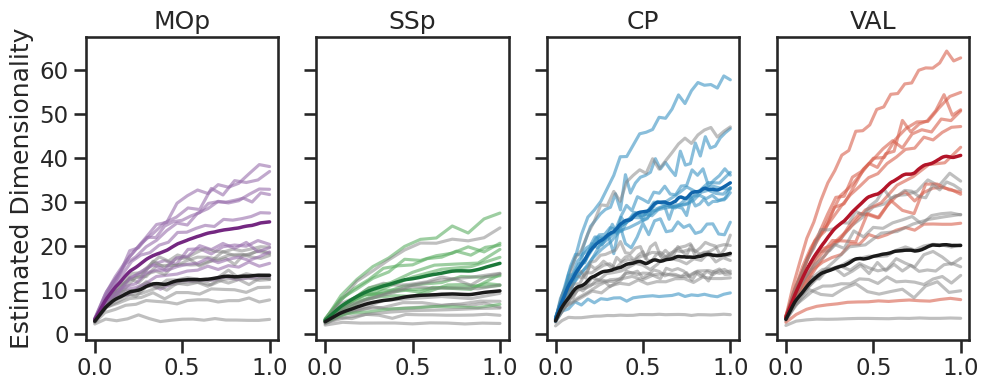

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

areas = ["MOp", "SSp", "CP", "VAL"]
with plt.style.context('seaborn-v0_8-bright'):
    sns.set_theme(context='talk', style='ticks')
    fig, axes = plt.subplots(1, len(areas), figsize=(10, 4), sharey='all')

    # Define how many points to interpolate to (shared x-axis resolution)
    n_interp_points = 100

    for area, ax in zip(areas, axes):
        interp_x = np.linspace(0, 1, n_interp_points)  # Normalised x-axis
        intertrial_interp = []
        free_interp = []

        for key in prs_with_variable_neurons.keys():
            # Intertrial
            x_inter = prs_with_variable_neurons[key][area]['intertrial']['neurons']
            y_inter = np.mean(prs_with_variable_neurons[key][area]['intertrial']['PR'], axis=1)

            x_norm_inter = (x_inter - np.min(x_inter)) / (np.max(x_inter) - np.min(x_inter))  # Normalise
            f_inter = interp1d(x_norm_inter, y_inter, kind='linear', bounds_error=False, fill_value='extrapolate')
            y_interp_inter = f_inter(interp_x)
            intertrial_interp.append(y_interp_inter)

            ax.plot(x_norm_inter, y_inter, color=getattr(colors, f"{area}_light"), alpha=0.6)

            # Free
            x_free = prs_with_variable_neurons[key][area]['free']['neurons']
            y_free = np.mean(prs_with_variable_neurons[key][area]['free']['PR'], axis=1)

            x_norm_free = (x_free - np.min(x_free)) / (np.max(x_free) - np.min(x_free))  # Normalise
            f_free = interp1d(x_norm_free, y_free, kind='linear', bounds_error=False, fill_value='extrapolate')
            y_interp_free = f_free(interp_x)
            free_interp.append(y_interp_free)

            ax.plot(x_norm_free, y_free, color='gray', alpha=0.5)

        # Mean curves
        mean_intertrial = np.mean(np.stack(intertrial_interp), axis=0)
        mean_free = np.mean(np.stack(free_interp), axis=0)

        ax.plot(interp_x, mean_intertrial, color=getattr(colors, area), linewidth=2.5, label='Mean Intertrial')
        ax.plot(interp_x, mean_free, color='k', linewidth=2.5, label='Mean Free')

        ax.set_title(area)
    axes[0].set_ylabel('Estimated Dimensionality')
        # ax.legend()

figpath = Path('/home/me24/tmp_results')

fig.savefig(figpath / 'pr_1.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()


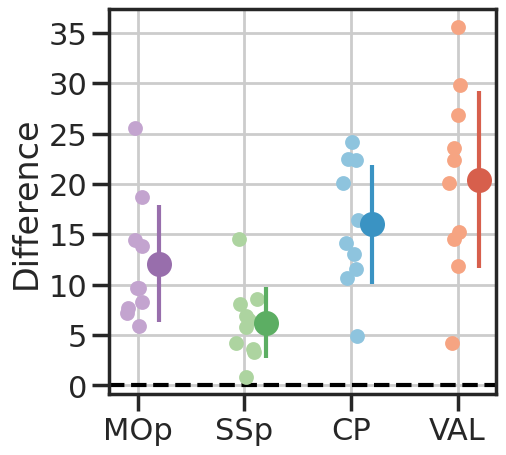

In [5]:
import numpy as np
import matplotlib.pyplot as plt

regions = ['MOp', 'SSp', 'CP', 'VAL']
sessions = list(prs_with_variable_neurons.keys())

region_diffs = {region: [] for region in regions}

# Compute differences: intertrial - free
for session in sessions:
    for region in regions:
        region_key = region
        free_val = np.mean(prs_with_variable_neurons[session][region]['free']['PR'], axis=1)[-1]
        inter_val = np.mean(prs_with_variable_neurons[session][region]['intertrial']['PR'], axis=1)[-1]
        diff = inter_val - free_val
        region_diffs[region].append(diff)


# Plot
with plt.style.context('seaborn-v0_8-bright'):
    sns.set_theme(context='poster', style='ticks')
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.grid(True)

    x_positions = np.arange(len(regions))
    width = 0.6

    # Plot all session diffs as grey points
    for i, region in enumerate(regions):
        diffs = region_diffs[region]
        jitter = np.random.normal(0, 0.05, size=len(diffs))
        ax.scatter(np.full(len(diffs), x_positions[i]) + jitter, diffs, color=getattr(colors, f"{region}_light_light"), s=75,
                   zorder=3)

        # Overlay mean ± std
        if diffs:
            mean = np.mean(diffs)
            std = np.std(diffs)
            ax.errorbar(x_positions[i]+0.2, mean, yerr=std, fmt='o', color=getattr(colors, f"{region}_light"), capsize=0, 
                        markersize=15, markeredgewidth=3, zorder=3)

    # Format
    ax.set_xticks(x_positions)
    ax.set_xticklabels(regions)
    ax.set_ylabel("Difference")
    # ax.set_title("Dimensionality difference per region")
    ax.axhline(0, linestyle='--', color='black')
    

    # plt.tight_layout()
figpath = Path('/home/me24/tmp_results')

fig.savefig(figpath / 'pr_2.pdf', bbox_inches='tight')
plt.show()
